# Subproject a
- Age vs eagerness to use platform correlation
- Author: Sergio S. (GitHub: esesancr) (mail: esesancr@gmail.com)

---

# Imports

#### Python libraries

In [1]:
import pandas as pd

import numpy as np

import os

import pprint

import matplotlib.pyplot as plt

from matplotlib.pyplot import figure

#### Ancillary modules

In [2]:
## Reloading module
%load_ext autoreload
%autoreload 2

from Sp_a_params import *
from Sp_a_funcs import *

---

# Upload and clean data

In [3]:
df = pd.read_csv(os.path.join(relative_data_loc, file_name))

In [4]:
cleaning_df(df)
df

,ID,Considera_tele,Cree_comun_tele,Regularidad_uso,Fecha_nacimiento
0,721,SI,5: Totalmente Común,3: Neutral,26/03/70
1,386,SI,3: Neutral,3: Neutral,29/05/77
2,652,SI,2: Poco común,1: No la utilizaría,01/01/78
3,362,SI,3: Neutral,2: Con poca regularidad,0
4,28,SI,4: Muy Común,3: Neutral,0
...,...,...,...,...,...
760,533,NO,4: Muy Común,5: Regularmente,0
761,201,NO,5: Totalmente Común,1: No la utilizaría,0
762,40,SI,2: Poco común,2: Con poca regularidad,0
763,63,NO,1: No será común,1: No la utilizaría,0


In order to avoid inconsistencies in the information we remove all dates `Fecha_nacimiento`$=0$

In [5]:
df.drop(df[df.Fecha_nacimiento=='0'].index,inplace=True) #"Removing" all date of birth==0.

In [6]:
df

,ID,Considera_tele,Cree_comun_tele,Regularidad_uso,Fecha_nacimiento
0,721,SI,5: Totalmente Común,3: Neutral,26/03/70
1,386,SI,3: Neutral,3: Neutral,29/05/77
2,652,SI,2: Poco común,1: No la utilizaría,01/01/78
5,501,SI,3: Neutral,3: Neutral,26/04/83
7,253,SI,3: Neutral,4: Con cierta regularidad,05/04/58
...,...,...,...,...,...
755,164,NO,1: No será común,2: Con poca regularidad,27/01/58
756,22,SI,3: Neutral,2: Con poca regularidad,12/02/51
757,390,NO,1: No será común,3: Neutral,28/10/49
758,259,SI,4: Muy Común,1: No la utilizaría,27/12/67


Continuing with the cleaning and transformation process, the next step is to convert `Fecha_nacimiento` to its correct date and time format as shown below.

In [7]:
#Summary of the dataframe where 'Fecha_nacimiento' is in object format.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 738 entries, 0 to 759
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                738 non-null    int64 
 1   Considera_tele    738 non-null    object
 2   Cree_comun_tele   738 non-null    object
 3   Regularidad_uso   738 non-null    object
 4   Fecha_nacimiento  738 non-null    object
dtypes: int64(1), object(4)
memory usage: 34.6+ KB


In [8]:
#Converting dtype object to datetime object
df["Fecha_nacimiento"] = pd.to_datetime(df["Fecha_nacimiento"])

In [9]:
#Summary of the dataframe where 'Fecha_nacimiento' is in datetime format.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 738 entries, 0 to 759
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                738 non-null    int64         
 1   Considera_tele    738 non-null    object        
 2   Cree_comun_tele   738 non-null    object        
 3   Regularidad_uso   738 non-null    object        
 4   Fecha_nacimiento  738 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 34.6+ KB


In [10]:
df.Fecha_nacimiento

0     1970-03-26
1     1977-05-29
2     1978-01-01
5     1983-04-26
7     2058-05-04
         ...    
755   2058-01-27
756   2051-12-02
757   2049-10-28
758   2067-12-27
759   1980-08-01
Name: Fecha_nacimiento, Length: 738, dtype: datetime64[ns]

Pandas `to_datetime` function has a parsing error where for some convertions, the year is sometimes correct but sometimes not. For example date 27/12/67 is converted to 2067-12-27.

To correct this issue, we created the function `fix_date` that solves the parsing of wrong years

In [11]:
df['Fecha_nacimiento'] = df['Fecha_nacimiento'] .apply(fix_date) #Solving the parsing issue.
df.Fecha_nacimiento

0      1970-03-26
1      1977-05-29
2      1978-01-01
5      1983-04-26
7      1958-05-04
          ...    
755    1958-01-27
756    1951-12-02
757    1949-10-28
758    1967-12-27
759    1980-08-01
Name: Fecha_nacimiento, Length: 738, dtype: object

The next step is to calculate doctor's age based on birthday date. For this task we created a function called `compute_age`

In [12]:
df['Edad'] = df['Fecha_nacimiento'] .apply(compute_age) #Computing doctor's age.
df.Edad

0      50
1      43
2      42
5      37
7      62
       ..
755    62
756    69
757    71
758    53
759    40
Name: Edad, Length: 738, dtype: int64

In [13]:
df #Dataframe ready for the analysis

,ID,Considera_tele,Cree_comun_tele,Regularidad_uso,Fecha_nacimiento,Edad
0,721,SI,5: Totalmente Común,3: Neutral,1970-03-26,50
1,386,SI,3: Neutral,3: Neutral,1977-05-29,43
2,652,SI,2: Poco común,1: No la utilizaría,1978-01-01,42
5,501,SI,3: Neutral,3: Neutral,1983-04-26,37
7,253,SI,3: Neutral,4: Con cierta regularidad,1958-05-04,62
...,...,...,...,...,...,...
755,164,NO,1: No será común,2: Con poca regularidad,1958-01-27,62
756,22,SI,3: Neutral,2: Con poca regularidad,1951-12-02,69
757,390,NO,1: No será común,3: Neutral,1949-10-28,71
758,259,SI,4: Muy Común,1: No la utilizaría,1967-12-27,53


# Initial data exploration

#### Histograms

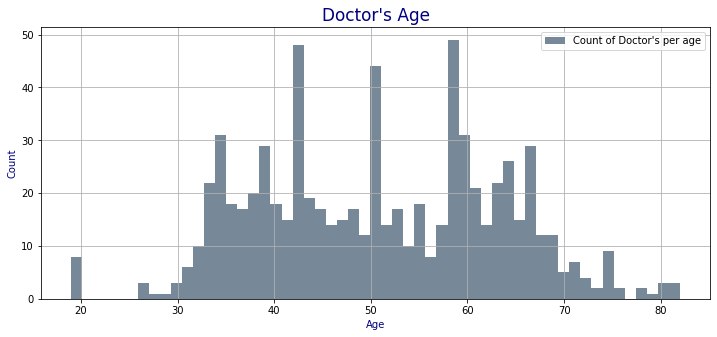

In [14]:
plot_hist(df,'Edad',55)

At first glance, we see above that there are some doctors who are under 20 years old. This behavior is probably an inconsistency in the database because the interviewed doctors are "Internists" and "Endocrinologists" who generally graduate after the age of 22 years old.

To avoid any incosistence in the information we decided to delete these records as follows:

In [15]:
df.drop(df[df.Edad<22].index,inplace=True) # "Removing" registers where doctor is younger than 22 yo 

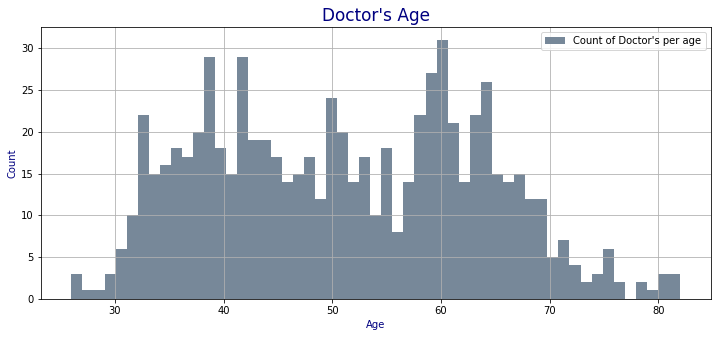

In [16]:
plot_hist(df,'Edad',55) #Histogram of count of doctors per age. 55 bins used

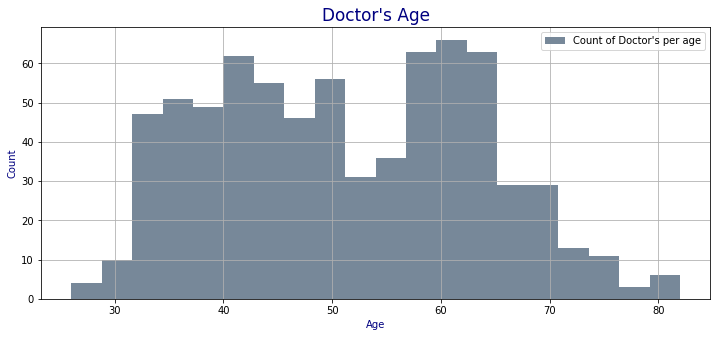

In [17]:
plot_hist(df,'Edad',20) #Histogram of count of doctors per age. 20 bins used

At this point we identify that this information looks like a bimodal distribution, where a good analysis could be try to identify if this distribution follows the behavior of a common known probability distribution. 

# Analysis 

## Doctor's age and his/her perception about the attractiveness of telemedicine

The objective of this analysis is to try to identify if there is already a relationship between doctor's age and his/her perception about the attractiveness of telemedicine.

The survey ansewerd by $765$ Internists and Endocrinologists contains a field called `Considera_tele` that answers the question **If they are willing to offer medical assistance (telemedicine)**

As first approach we plot the histogram showing the count of 'Negative' and 'Positive' perceptions of doctors grouped by doctor's age.

As we see below, line chart doesn't provide information to identify whether there is a relationship between doctor's age and his/her perception about telemedicine.

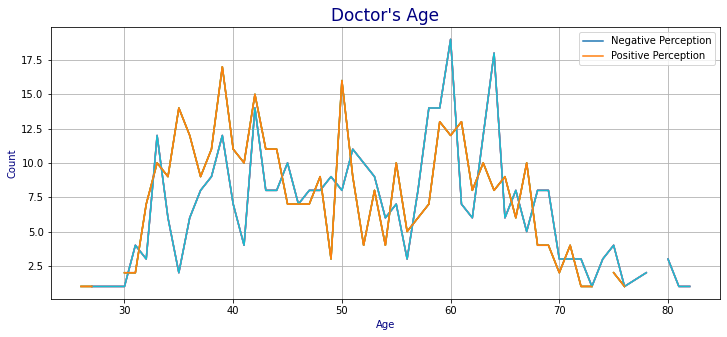

In [18]:
plot_line_groupedby(df,'Edad','Considera_tele')

In order to analyse doctor's willingness to offer telemedicine services, we need to separately analyze doctors perception and see if there is a correlation with their age. 

Due this, we created 2 groups that summarize 'negative and positive perception by age' and 'total count of perceptions by age'.

In [19]:
#Creating groups in order to summarize perception information.
ggroup_perc_count= df['ID'].groupby([df['Edad'],df['Considera_tele']]).count().reset_index() #Creating pandas df for count per perception
ggroup_total_count= df['ID'].groupby([df['Edad']]).count().reset_index() #Creating pandas df for total count

As next step, we merged both dataframes in order to mantain a unified record of perceptions and their relationship to the total.

This step is very important because it provides us the information that will allow us to calculate the **RATIO** of perceptions to the total.

In [20]:
ggroup_perc=pd.merge(ggroup_perc_count,ggroup_total_count,on='Edad') #Merging pandas df

#Renaming ggroup_perception cols names
rc = {
    'ID_x': 'Conteo',
    'ID_y':'Total'
    }

ggroup_perc.rename(rc, axis=1, inplace=True)

ggroup_perc

,Edad,Considera_tele,Conteo,Total
0,26,SI,1,1
1,27,NO,1,2
2,27,SI,1,2
3,28,NO,1,1
4,29,NO,1,1
...,...,...,...,...
103,79,SI,1,1
104,80,NO,3,3
105,81,NO,1,2
106,81,SI,1,2


In [21]:
ggroup_no = ggroup_perc.copy()
ggroup_si = ggroup_perc.copy()

ggroup_no.drop(ggroup_no[ggroup_no.Considera_tele=='SI'].index,inplace=True) #"Removing".
ggroup_si.drop(ggroup_si[ggroup_si.Considera_tele=='NO'].index,inplace=True) #"Removing".
ggroup_si.drop(ggroup_si[ggroup_si.Considera_tele=='No'].index,inplace=True) #"Removing".

Once we have the necessary information, we proceed with the convertion of the pandas dataframe to a NumPy array. This convertion obey the fact that we need NumPy arrays in order to use `polyfit` for the calculation of the Regression Model by the method of **Least squares polynomial fit**

In [22]:
np_neg_perc=ggroup_no.to_numpy() #Creating numpy array "Negative Perception" from pandas dataframe
np_pos_perc=ggroup_si.to_numpy() #Creating numpy array "Positive Perception" from pandas dataframe

In [23]:
#Negative Perception
x_neg=np.array(np_neg_perc[:,0],dtype=float)
y_neg=np.array(np_neg_perc[:,2],dtype=float)
y_neg_esc=np.array(np_neg_perc[:,2]/np_neg_perc[:,3],dtype=float)

#Positive Perception
x_pos=np.array(np_pos_perc[:,0],dtype=float)
y_pos=np.array(np_pos_perc[:,2],dtype=float)
y_pos_esc=np.array(np_pos_perc[:,2]/np_pos_perc[:,3],dtype=float)

## Linear Regression Model

Recalling what was seen in class, Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. 

In our case **the explanatory variable is the doctor's age**, and the **dependent variable is the Negative or Positive perception about the attractiveness of telemedicine**

Due we don't expect a regression line that must pass through the origin we opted for the **regression model with intercept**

$$f(x|\beta) = \beta_0 + \beta_1 x$$ $$(x_i,y_i)\forall i=0,1,\dots,m$$

where $\phi_0(x) = 1$, $\phi_1(x) =x$. And we need to calculate: $\beta_0, \beta_1$.

#### Negative Perception

Linear Regression that correlates doctor's age and their Negative perception about the attractiveness of telemedicine

In [24]:
ndegree = 1
coefficients = np.polyfit(x_neg,y_neg_esc,ndegree)
pprint.pprint(coefficients)

array([0.00432852, 0.28488185])


Then:

$$f(x|\beta) = \beta_0 + \beta_1 x$$

$$p_{np}(x) = 0.00432852x + 0.28488185$$

With our beta's adjusted as $\hat{\beta_0} = 0.28488185$, $\hat{\beta_1} = 0.00432852$.

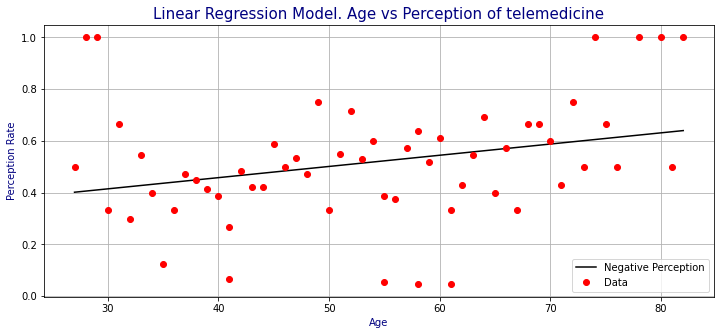

In [25]:
linear_regression(x_neg,y_neg_esc,1,"Negative Perception")

#### Positive Perception

Linear Regression that correlates doctor's age and their Positive perception about the attractiveness of telemedicine

In [26]:
ndegree = 1
coefficients = np.polyfit(x_pos,y_pos_esc,ndegree)
pprint.pprint(coefficients)

array([-0.0031727 ,  0.68710041])


Then:

$$f(x|\beta) = \beta_0 + \beta_1 x$$

$$p_{np}(x) = -0.0031727x + 0.68710041$$

With our beta's adjusted as $\hat{\beta_0} = 0.68710041$, $\hat{\beta_1} = -0.0031727$.

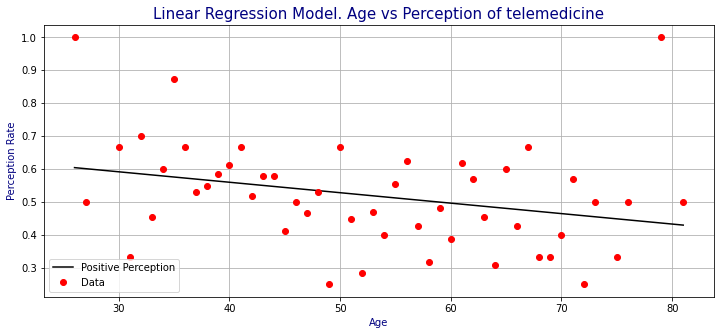

In [27]:
linear_regression(x_pos,y_pos_esc,1,"Positive Perception")

## Conclusion

As we could see in both analyzes, we corroborated that already exists a relationship between doctor's age and their willingness to offer telemedicine services and we concluded that **as doctors get older, they are less willing to offer telemedicine medical assistance services.**